In [1]:
from lib.controller import Controller
from lib.automation import FileDetector
import time

In [2]:
# Commonly changed settings

new_rig_settings = True
datadir = "./tsm_targets/05-31-22" # All files in this directory + subdirectories are loaded
if new_rig_settings:
    datadir = None # auto selects "C:/Turbo-SM/SMDATA/John/mm-dd-yy" on new rig
n_group_by_trials = 5 # Treats every n selected files as trials to combine into single ZDA file

c = Controller(camera_program=4,
              new_rig_settings=new_rig_settings,
              should_auto_launch=False,  # set to False as a safety to avoid double-launch
              datadir=datadir)
fd = FileDetector(directory=c.get_data_dir())
print("Data exchange directory:", c.get_data_dir())

Data exchange directory: C:/Turbo-SM/SMDATA/John/06-10-22


In [3]:
c.start_up() # launch and orchestrate



In [4]:
# auto mode: TSM scheduling
c = Controller(camera_program=4,
              new_rig_settings=new_rig_settings,
              should_auto_launch=False,
              datadir=datadir,  
              filename_PhotoZ_format=False)
c.run_recording_schedule()  # default: takes 5 trials at 15-s intervals


[]
New file detected: Untitled026.tsm
New file detected: Untitled027.tsm
New file detected: Untitled028.tsm
New file detected: Untitled029.tsm
New file detected: Untitled030.tsm
New file detected: Untitled031.tsm
New file detected: Untitled032.tsm
New file detected: Untitled033.tsm
New file detected: Untitled034.tsm
New file detected: Untitled035.tsm
New file detected: Untitled036.tsm
New file detected: Untitled037.tsm
New file detected: Untitled038.tsm
New file detected: Untitled039.tsm
New file detected: Untitled040.tsm
New file detected: Untitled041.tsm
New file detected: Untitled042.tsm
New file detected: Untitled043.tsm
New file detected: Untitled044.tsm
New file detected: Untitled045.tsm
New file detected: Untitled046.tsm
New file detected: Untitled047.tsm
New file detected: Untitled048.tsm
New file detected: Untitled049.tsm
New file detected: Untitled050.tsm
Preparing to process into ZDA file(s)... 
C:/Turbo-SM/SMDATA/John/06-10-22/Untitled026.tsm to be treated as TSM file to op

{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
C:/Turbo-SM/SMDATA/John/06-10-22\1-1/Untitled011.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
C:/Turbo-SM/SMDATA/John/06-10-22\1-1/Untitled012.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
C:/Turbo-SM/SMDATA/John/06-10-22\1-1/Untitled013.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'po

{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)


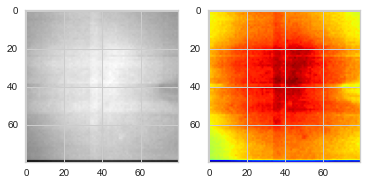

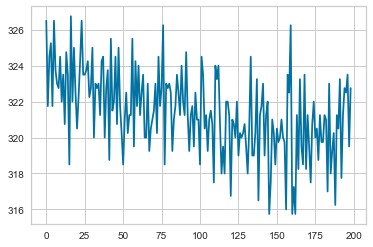

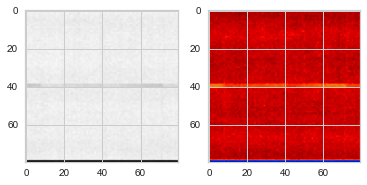

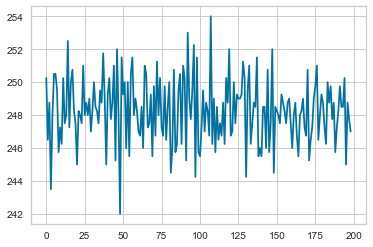

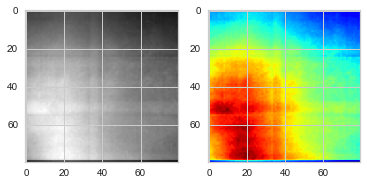

(1, 199, 80, 80)


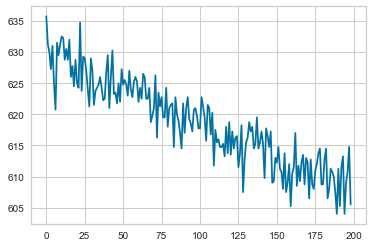

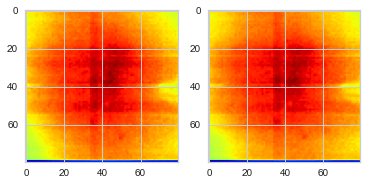

(1, 199, 80, 80)


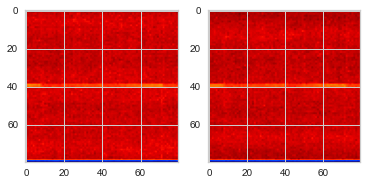

(1, 199, 80, 80)


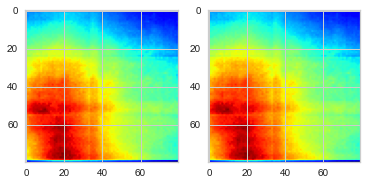

(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
trial group 0
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled026.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled027.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled028.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled029.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled030.tsm
trial group 1
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled031.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled032.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled033.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled034.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled035.tsm
trial group 2
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled036.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled037.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled038.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled039.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled040.tsm
trial group 3
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled041.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitled042.tsm
	 C:/Turbo-SM/SMDATA/John/06-10-22/Untitl

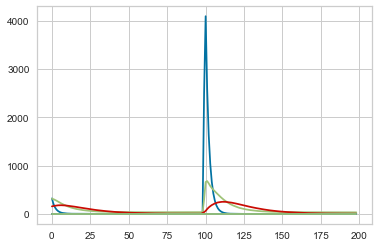

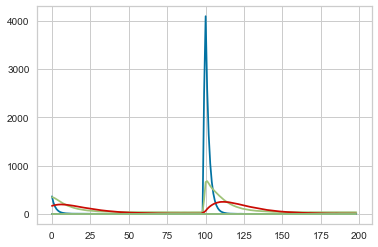

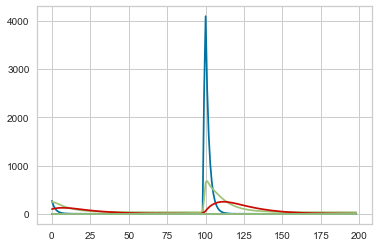

In [3]:
fd.start_file_detection_loop()  # runs in background
recording_no=2
new_files = []
# with 2 threads in background creating and discovering files, main thread does the file conversion
for i in range(20):
    time.sleep(3)
    new_files += fd.get_unprocessed_file_list()
    if len(new_files) >= n_group_by_trials:
        new_files.sort()
        print("Preparing to process into ZDA file(s)... ")
        time.sleep(5)  # wait for TurboSM to finish writing to disk
        n_process = len(new_files) - (len(new_files) % n_group_by_trials)
        c.select_files(selected_filenames=new_files[:n_process])
        c.process_files(n_group_by_trials=n_group_by_trials)
        new_files = new_files[n_process:]
        recording_no += len(new_files)
        # to do: auto-archive processed files by moving them to a directory 'slice-loc'
    print(new_files)
    
fd.stop_file_detection_loop()

In [ ]:
# manual mode example: processing only
""" c.select_files(slice_no=3, 
                   location_no=1,
                   recording_no=1, 
                   filename_base="3-1-",
                   filename_start_no=1,
                   filename_end_no=25)
c.process_files(n_group_by_trials=n_group_by_trials) """

# 